# Homework 1

\\

Here we take temperatures data of Stockholm as our input data. In the folder you can find a csv file called 'stockholm.csv'.

However, due to the carelessness of the staff when entering the data, some recorded temperature has an extra letter 'a' or 'b' at the end (for example, 4a or -3.1b). But now the staff totally forgets the loations of these mistakes.

\\

- Task 1: Now please help this staff find out these mistake lines, collect them and print them out. (data cleaning)
  
  Hint: for pandas dataframe types of data has a some functions can directly find the str contains some specific information(search these functions by yourself on internet); for list, we need loop + conditions + some functions (find(), index() or endswith(), please check them by yourself



- Task 2: calculate the average temperature of each day, and write them as the 6 coloumn in the 'stockholm_temperature.csv' file.

\\


For scientific research reasons, now this staff want to transfer the unit of these average temperature.

\\


- Task 3: Write down your code about the unit transfer between the Celsius and Kelvin. Please try to define it as a function and wrap them into a class. Save this code as a python file. 

- Task 4: Write a code to find out the maximum and minimum average temperatures， and transfer these temperatures from Celsius to Kelvin by calling the functions in your python file in Task 3.

\\
Extra task:

- Extra tasks for interests: Find out the maximum and minimum temperature of each year respectively. And plot out the (Year versus max-aver_T) and (Year versus min_aver-T) plots. 
(please check how to do basic plot in matplotlib before, the lecture file of plot is also attached)


In [3]:
### Here please read the data
import pandas as pd

df = pd.read_csv("stockholm.csv")
df.dropna(inplace = True)
print(df)

df.dtypes


       Year  Month  Day  T_max  T_min
0      1800      1    1   -6.1   -6.1
1      1800      1    2  -15.4  -15.4
2      1800      1    3    -15    -15
3      1800      1    4  -19.3  -19.3
4      1800      1    5  -16.8  -16.8
...     ...    ...  ...    ...    ...
77426  2011     12   27    8.3    7.6
77427  2011     12   28    2.6    1.9
77428  2011     12   29    4.9    4.2
77429  2011     12   30    0.6   -0.1
77430  2011     12   31   -2.6   -3.3

[77431 rows x 5 columns]


Year      int64
Month     int64
Day       int64
T_max    object
T_min    object
dtype: object

In [4]:
print(df[df['T_max'].str.contains('a|b')])
print(df[df['T_min'].str.contains('a|b')])


       Year  Month  Day  T_max T_min
9383   1825      9   10    14a    14
51423  1940     10   17   7.1a     7
62582  1971      5    7  14.7a  13.5
73385  2000     12    3   6.2b   5.7
       Year  Month  Day T_max  T_min
35270  1896      7   26  18.2  17.7a
56724  1955      4   23   1.8     1a
70657  1993      6   15  10.8   9.7b


In [5]:
### Here please clean the data
df['T_max'] = df['T_max'].mask(df['T_max'].str.contains('a|b'), df['T_max'].str.replace('a|b', ''))
df['T_min'] = df['T_min'].mask(df['T_min'].str.contains('a|b'), df['T_min'].str.replace('a|b', ''))

print(df[df['T_max'].str.contains('a|b')])
print(df[df['T_min'].str.contains('a|b')])

Empty DataFrame
Columns: [Year, Month, Day, T_max, T_min]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, T_max, T_min]
Index: []


In [6]:
df['T_max'] = df['T_max'].astype(float)
df['T_min'] = df['T_min'].astype(float)

print(df.head())
df.dtypes

   Year  Month  Day  T_max  T_min
0  1800      1    1   -6.1   -6.1
1  1800      1    2  -15.4  -15.4
2  1800      1    3  -15.0  -15.0
3  1800      1    4  -19.3  -19.3
4  1800      1    5  -16.8  -16.8


Year       int64
Month      int64
Day        int64
T_max    float64
T_min    float64
dtype: object

In [7]:
### Here please calculate the average temperature and write the file
df['T_avg'] = df[['T_max', 'T_min']].mean(axis=1)
df

,Year,Month,Day,T_max,T_min,T_avg
0,1800,1,1,-6.1,-6.1,-6.10
1,1800,1,2,-15.4,-15.4,-15.40
2,1800,1,3,-15.0,-15.0,-15.00
3,1800,1,4,-19.3,-19.3,-19.30
4,1800,1,5,-16.8,-16.8,-16.80
...,...,...,...,...,...,...
77426,2011,12,27,8.3,7.6,7.95
77427,2011,12,28,2.6,1.9,2.25
77428,2011,12,29,4.9,4.2,4.55
77429,2011,12,30,0.6,-0.1,0.25


In [8]:
df.to_csv('stockholm_temperature.csv', index=False)

In [9]:
### Here please construct the class and define the function for your unit transfer code, after please copy-paste and save it as '.py' file.
class Temperature:
    def __init__(self, temp, unit) :
        self.temp = temp
        self.unit = unit

    def __str__(self):
        return f"{self.temp} {self.unit}"

    def celciusToKelvin(self):
        if self.unit == 'C':
            self.unit = 'K'
            return Temperature(self.temp + 273, self.unit)

    def kelvinToCelcius(self):
        if self.unit == 'K' :
            self.unit = 'C'
            return Temperature(self.temp - 273, self.unit)

In [10]:
### Here please import your '.py' file first, then find out the maximum and minimum average temperatures and transfer the unit to Kelvin by calling function in your module.
from Temperature import Temperature

max = Temperature(df['T_avg'].max(), 'C')
min = Temperature(df['T_avg'].min(), 'C')

print("The maximum average temperature is", max.celciusToKelvin())
print("The minimum average temperature is", min.celciusToKelvin())

The maximum average temperature is 300.9 K
The minimum average temperature is 247.2 K


In [11]:
### Extra tasks part for interests

yearList = []
tempMaxList = []
tempMinList = []

data_max = df.groupby('Year')['T_max'].mean()
data_min = df.groupby('Year')['T_min'].mean()

for year, t_max in data_max.items():
    yearList.append(year)
    tempMaxList.append(t_max)

for year, t_min in data_min.items():
    tempMinList.append(t_min)

print(tempMinList[210])

5.257260273972603


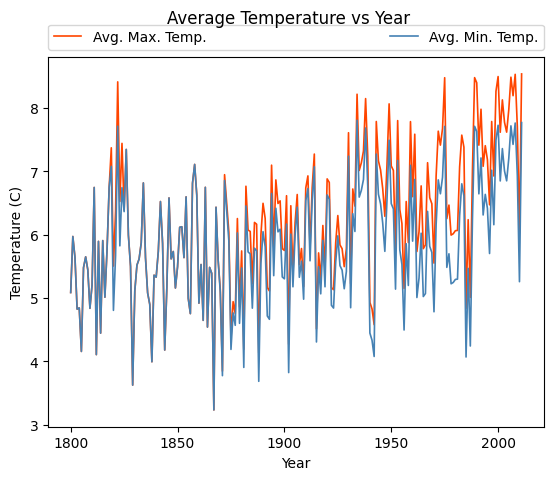

In [12]:
import matplotlib.pyplot as plt

plt.plot(yearList, tempMaxList, lw=1.2, label='Avg. Max. Temp.', color='orangered')
plt.plot(yearList, tempMinList, lw=1.2, label='Avg. Min. Temp.', color='steelblue')

plt.xlabel("Year", fontsize=10)
plt.ylabel("Temperature (C)", fontsize=10)

plt.suptitle('Average Temperature vs Year', fontsize=12)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()